In [1]:
from eom import *
from dmpc import *
from sympy import symbols, factor
from sympy import simplify
from sympy.physics.mechanics import *
from sympy import sin, cos, symbols, Matrix, solve
from sympy.physics.vector import init_vprinting
init_vprinting()

In [2]:
# Define Symbolic Variables
x,x_l,theta = dynamicsymbols('x,x_l,theta')
phi = dynamicsymbols('phi')
F,F_l = dynamicsymbols('F,F_l')
r,h_c,h_t = symbols('r,h_c,h_t')
I_w,I_c,I_t = symbols('I_w,I_c,I_t')
m_w, m_c, m_t, g, t = symbols('m_w, m_c, m_t, g, t')

In [3]:
# Generalized coordinates
q = Matrix([[x], [x_l], [theta]])
qd = q.diff()
qdd = qd.diff()

In [4]:
M = sympy.Matrix([[m_w+(I_w/r**2)+m_c+m_t, m_t*sympy.cos(theta), m_c*h_c*sympy.cos(theta)+m_t+h_t*sympy.cos(theta)-m_t*x_l*sympy.sin(theta)],
                  [m_t*sympy.cos(theta), m_t, m_t+h_t],
                  [m_c*h_c*sympy.cos(theta)+m_t*h_t*sympy.cos(theta)-m_t*x_l*sympy.sin(theta), m_t*h_t, m_c*h_c**2+I_c+m_t*h_t**2+m_t*x_l**2+I_t]])
C = sympy.Matrix([[-((m_c*h_c+m_t*h_t)*sympy.sin(theta) + m_t*x_l*sympy.cos(theta))*theta.diff()**2], [0], [2*x_l*x_l.diff()*theta.diff()]])
G = sympy.Matrix([[0], [-m_t*g*sympy.sin(theta)], [-m_c*g*h_c*sympy.sin(theta)-m_t*g*(h_t*sympy.sin(theta)+x_l*sympy.cos(theta))]])
M, C, G

⎛⎡            I_w                                                             
⎜⎢            ─── + m_c + mₜ + m_w              mₜ⋅cos(θ)  h_c⋅m_c⋅cos(θ) + hₜ
⎜⎢              2                                                             
⎜⎢             r                                                              
⎜⎢                                                                            
⎜⎢                 mₜ⋅cos(θ)                       mₜ                         
⎜⎢                                                                            
⎜⎢                                                                           2
⎝⎣h_c⋅m_c⋅cos(θ) + hₜ⋅mₜ⋅cos(θ) - mₜ⋅xₗ⋅sin(θ)    hₜ⋅mₜ        I_c + Iₜ + h_c 

                           ⎤                                                  
⋅cos(θ) - mₜ⋅xₗ⋅sin(θ) + mₜ⎥  ⎡                                            2⎤ 
                           ⎥  ⎢(-mₜ⋅xₗ⋅cos(θ) - (h_c⋅m_c + hₜ⋅mₜ)⋅sin(θ))⋅θ̇ ⎥
                           ⎥  ⎢                    

In [5]:
dynamic = sympy.Matrix([[(m_w+(I_w/r**2)+m_c+m_t)*x.diff().diff()+(m_c*h_c*sympy.cos(theta)+m_t*h_t*sympy.cos(theta)-m_t*x_l*sympy.sin(theta))*theta.diff().diff() + m_t*sympy.cos(theta)*x_l.diff().diff()+(-m_c*h_c-m_t*h_t)*theta.diff()**2*sympy.sin(theta) - m_t*x_l*theta.diff()**2*sympy.cos(theta) - 2*m_t*x_l.diff()*theta.diff()*sympy.sin(theta)-F],
                        [m_t*sympy.cos(theta)*x.diff().diff() + m_t*x_l.diff().diff() + m_t*h_t*theta.diff().diff() - m_t*g*sympy.sin(theta)-F_l],
                        [(m_c*h_c*sympy.cos(theta)+m_t*h_t*sympy.cos(theta)-m_t*x_l*sympy.sin(theta))*x.diff().diff() + m_t*h_t*x_l.diff().diff() + (m_c*h_c**2 + I_c + m_t*h_t**2 + m_t*x_l**2 + I_t)*theta.diff().diff() + 2*x_l*x_l.diff()*theta.diff() - m_c*g*h_c*sympy.sin(theta) - m_t*g*(h_t*sympy.sin(theta) + x_l*sympy.cos(theta))]])


dynamic

⎡                 2                                                           
⎢ - mₜ⋅xₗ⋅cos(θ)⋅θ̇  - 2⋅mₜ⋅sin(θ)⋅θ̇⋅xₗ̇ + mₜ⋅cos(θ)⋅xₗ̈ + (-h_c⋅m_c - hₜ⋅mₜ)
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                          -g⋅mₜ⋅sin(θ) + hₜ⋅m
⎢                                                                             
⎢                                                                             
⎣-g⋅h_c⋅m_c⋅sin(θ) - g⋅mₜ⋅(hₜ⋅sin(θ) + xₗ⋅cos(θ)) + hₜ⋅mₜ⋅xₗ̈ + (h_c⋅m_c⋅cos(θ

     2                                                      ⎛I_w              
⋅sin(θ)⋅θ̇  + (h_c⋅m_c⋅cos(θ) + hₜ⋅mₜ⋅cos(θ) - mₜ⋅xₗ⋅sin(θ))⋅θ̈ + ⎜─── + m_c +
                                                            ⎜  2              
                                                   

In [6]:
# Control Input Variable
u = Matrix([[F], [F_l]])

# Inverse Dynamics Equation
# M(q)*qdd + C(q,qd) + G(q) = W*u
M, C, G, W = get_EoM_from_T(dynamic,qdd,g,u)
M, C, G, W

⎛⎡            I_w                                                             
⎜⎢            ─── + m_c + mₜ + m_w              mₜ⋅cos(θ)  h_c⋅m_c⋅cos(θ) + hₜ
⎜⎢              2                                                             
⎜⎢             r                                                              
⎜⎢                                                                            
⎜⎢                 mₜ⋅cos(θ)                       mₜ                         
⎜⎢                                                                            
⎜⎢                                                                          2 
⎝⎣h_c⋅m_c⋅cos(θ) + hₜ⋅mₜ⋅cos(θ) - mₜ⋅xₗ⋅sin(θ)    hₜ⋅mₜ       I_c + Iₜ + h_c ⋅

                         ⎤                                                    
⋅mₜ⋅cos(θ) - mₜ⋅xₗ⋅sin(θ)⎥                                                    
                         ⎥  ⎡-(mₜ⋅xₗ⋅cos(θ)⋅θ̇ + 2⋅mₜ⋅sin(θ)⋅xₗ̇ + (h_c⋅m_c + 
                         ⎥  ⎢                      

In [7]:
linearlize_eq = {sin(theta):theta, cos(theta):1, theta.diff():0, x_l:0}
inv_dyn_linear = msubs(dynamic, linearlize_eq)
inv_dyn_linear

⎡                                               ⎛I_w                 ⎞        
⎢                 mₜ⋅xₗ̈ + (h_c⋅m_c + hₜ⋅mₜ)⋅θ̈ + ⎜─── + m_c + mₜ + m_w⎟⋅ẍ - 
⎢                                               ⎜  2                 ⎟        
⎢                                               ⎝ r                  ⎠        
⎢                                                                             
⎢                           -g⋅mₜ⋅θ + hₜ⋅mₜ⋅θ̈ + mₜ⋅ẍ + mₜ⋅xₗ̈ - Fₗ          
⎢                                                                             
⎢                                                            ⎛              2 
⎣-g⋅h_c⋅m_c⋅θ - g⋅hₜ⋅mₜ⋅θ + hₜ⋅mₜ⋅xₗ̈ + (h_c⋅m_c + hₜ⋅mₜ)⋅ẍ + ⎝I_c + Iₜ + h_c

               ⎤
F                 ⎥
               ⎥
               ⎥
               ⎥
                  ⎥
               ⎥
        2   ⎞  ⎥
 ⋅m_c + hₜ ⋅mₜ⎠⋅θ̈⎦

In [8]:
# Linearized Model
Ml, Cl, Gl, Wl = get_EoM_from_T(inv_dyn_linear,qdd,g,u)

# Physical Parameters
#param = {r:0.25, h_c:0.25, h_t:0.25, m_w:30, m_c:370, m_t:300, g:9.8}
param = {r:0.253, h_c:0.05774, h_t:0.28433, m_w:19.19, m_c:31.914, m_t:424.5612, g:9.8}

# pendulum size
param['c_width'] = 0.7 #0.5
param['c_height'] = 0.2 #0.25

# torso size
param['t_width'] = 2.5
param['t_height'] = 0.5

# Moment of Inertia
param[I_w] = 0.2734
param[I_c] = 0.6541
param[I_t] = 173.4619

Mlp = msubs(Ml, param)
Clp = msubs(Cl, param)
Glp = msubs(Gl, param)
Wlp = msubs(Wl, param)
# Mlp, Clp, Glp, Wlp
Ml, Cl, Gl, Wl

⎛⎡I_w                                                      ⎤                  
⎜⎢─── + m_c + mₜ + m_w   mₜ          h_c⋅m_c + hₜ⋅mₜ       ⎥                  
⎜⎢  2                                                      ⎥  ⎡0⎤  ⎡          
⎜⎢ r                                                       ⎥  ⎢ ⎥  ⎢          
⎜⎢                                                         ⎥, ⎢0⎥, ⎢       -g⋅
⎜⎢         mₜ            mₜ               hₜ⋅mₜ            ⎥  ⎢ ⎥  ⎢          
⎜⎢                                                         ⎥  ⎣0⎦  ⎣-g⋅(h_c⋅m_
⎜⎢                                           2         2   ⎥                  
⎝⎣  h_c⋅m_c + hₜ⋅mₜ     hₜ⋅mₜ  I_c + Iₜ + h_c ⋅m_c + hₜ ⋅mₜ⎦                  

                     ⎞
                     ⎟
0           ⎤  ⎡1  0⎤⎟
            ⎥  ⎢    ⎥⎟
mₜ⋅θ        ⎥, ⎢0  1⎥⎟
            ⎥  ⎢    ⎥⎟
c + hₜ⋅mₜ)⋅θ⎦  ⎣0  0⎦⎟
                     ⎟
                     ⎠

In [9]:
# Forward Dynamics eqation
# qdd = M(q)^-1 * ( -C(q,qd) - G(q) + W*u )
Mlp_inv = simplify(Mlp.inv())
qdd_rhs_A = simplify(Mlp_inv*(-Clp -Glp))
qdd_rhs_B = simplify(Mlp_inv*Wlp*u)
qdd_rhs_A, qdd_rhs_B

⎛⎡-75.1663229329776⋅θ⎤  ⎡  0.0180649594595825⋅F - 0.018010632711615⋅Fₗ   ⎤⎞
⎜⎢                   ⎥  ⎢                                                ⎥⎟
⎜⎢84.7108037317285⋅θ ⎥, ⎢  -0.018010632711615⋅F + 0.0207758673732741⋅Fₗ  ⎥⎟
⎜⎢                   ⎥  ⎢                                                ⎥⎟
⎝⎣0.898671266658828⋅θ⎦  ⎣-0.000191069348881784⋅F - 0.00144149977776129⋅Fₗ⎦⎠

In [10]:
# Nonlinear Dynamics Model
Mp = msubs(M, param)
Cp = msubs(C, param)
Gp = msubs(G, param)
Wp = msubs(W, param)
Mp, Cp, Gp, Wp

⎛⎡             479.936474352044               424.5612⋅cos(θ)  -424.5612⋅xₗ⋅si
⎜⎢                                                                            
⎜⎢             424.5612⋅cos(θ)                   424.5612                    1
⎜⎢                                                                            
⎜⎢                                                                            
⎝⎣-424.5612⋅xₗ⋅sin(θ) + 122.558200356⋅cos(θ)   120.715485996        424.5612⋅x

n(θ) + 122.558200356⋅cos(θ)⎤                                                  
                           ⎥  ⎡-(424.5612⋅xₗ⋅cos(θ)⋅θ̇ + 122.558200356⋅sin(θ)⋅
20.715485996               ⎥  ⎢                                               
                           ⎥, ⎢                                   0           
 2                         ⎥  ⎢                                               
ₗ  + 208.545432460389      ⎦  ⎣                               2⋅xₗ⋅θ̇⋅xₗ̇     

                                                  

In [11]:
# Forward Dynamics eqation
# qdd = M(q)^-1 * ( -C(q,qd) - G(q) + W*u )
Mp_inv = (Mp.inv())
qdd_rhs_A_nonL = (Mp_inv*(-Cp -Gp))
qdd_rhs_B_nonL = (Mp_inv*Wp*u)
qdd_rhs_A_nonL, qdd_rhs_B_nonL

⎛⎡                                                                            
⎜⎢                                                                            
⎜⎢────────────────────────────────────────────────────────────────────────────
⎜⎢                       2    2       2                             2    2    
⎜⎢3.17737902524803e+18⋅xₗ ⋅sin (θ)⋅cos (θ) - 3.59180275319006e+18⋅xₗ ⋅sin (θ) 
⎜⎢                                                                            
⎜⎢                                                                            
⎜⎢                                                                            
⎜⎢         ───────────────────────────────────────────────────────────────────
⎜⎢                                2    2       2                             2
⎜⎢         6.62041581552594e+15⋅xₗ ⋅sin (θ)⋅cos (θ) - 7.48391286167467e+15⋅xₗ 
⎜⎢                                                                            
⎜⎢                                                  

In [12]:
# State-space equation. 
X = q.col_join(qd)
Xd_A = qd.col_join(qdd_rhs_A)
Xd_B = qd.col_join(qdd_rhs_B)
U = u
X, U, Xd_A, Xd_B

⎛⎡x ⎤        ⎡         ẋ         ⎤  ⎡                       ẋ               
⎜⎢  ⎥        ⎢                   ⎥  ⎢                                         
⎜⎢xₗ⎥        ⎢        xₗ̇         ⎥  ⎢                       xₗ̇              
⎜⎢  ⎥        ⎢                   ⎥  ⎢                                         
⎜⎢θ ⎥  ⎡F ⎤  ⎢         θ̇         ⎥  ⎢                       θ̇               
⎜⎢  ⎥, ⎢  ⎥, ⎢                   ⎥, ⎢                                         
⎜⎢ẋ ⎥  ⎣Fₗ⎦  ⎢-75.1663229329776⋅θ⎥  ⎢  0.0180649594595825⋅F - 0.0180106327116
⎜⎢  ⎥        ⎢                   ⎥  ⎢                                         
⎜⎢xₗ̇⎥        ⎢84.7108037317285⋅θ ⎥  ⎢  -0.018010632711615⋅F + 0.0207758673732
⎜⎢  ⎥        ⎢                   ⎥  ⎢                                         
⎝⎣θ̇ ⎦        ⎣0.898671266658828⋅θ⎦  ⎣-0.000191069348881784⋅F - 0.001441499777

         ⎤⎞
       ⎥⎟
         ⎥⎟
       ⎥⎟
         ⎥⎟
       ⎥⎟
15⋅Fₗ   ⎥⎟
       ⎥⎟
741⋅Fₗ  ⎥⎟
       ⎥⎟
76129⋅Fₗ⎦⎠

In [13]:
# State-space equation
A = simplify(Xd_A.jacobian(X))
B = simplify(Xd_B.jacobian(U))
C = simplify(X.jacobian(X))
D = simplify(X.jacobian(U))
A, B, C, D

⎛⎡0  0          0          1  0  0⎤  ⎡          0                     0       
⎜⎢                                ⎥  ⎢                                        
⎜⎢0  0          0          0  1  0⎥  ⎢          0                     0       
⎜⎢                                ⎥  ⎢                                        
⎜⎢0  0          0          0  0  1⎥  ⎢          0                     0       
⎜⎢                                ⎥, ⎢                                        
⎜⎢0  0  -75.1663229329776  0  0  0⎥  ⎢ 0.0180649594595825     -0.0180106327116
⎜⎢                                ⎥  ⎢                                        
⎜⎢0  0  84.7108037317285   0  0  0⎥  ⎢ -0.018010632711615     0.02077586737327
⎜⎢                                ⎥  ⎢                                        
⎝⎣0  0  0.898671266658828  0  0  0⎦  ⎣-0.000191069348881784  -0.00144149977776

   ⎤  ⎡1  0  0  0  0  0⎤  ⎡0  0⎤⎞
   ⎥  ⎢                ⎥  ⎢    ⎥⎟
   ⎥  ⎢0  1  0  0  0  0⎥  ⎢0  0⎥⎟
   ⎥  ⎢                ⎥  ⎢ 

In [14]:
import pylab as pl
import control

ss0 = [A, B, C, D]
sys0 = control.ss(*[pl.array(mat_i.subs(param)).astype(float) for mat_i in ss0])
mprint(sys0)

<LinearIOSystem>: sys[2]
Inputs (2): ['u[0]', 'u[1]']
Outputs (6): ['y[0]', 'y[1]', 'y[2]', 'y[3]', 'y[4]', 'y[5]']
States (6): ['x[0]', 'x[1]', 'x[2]', 'x[3]', 'x[4]', 'x[5]']

A = [[  0.           0.           0.           1.           0.
        0.        ]
     [  0.           0.           0.           0.           1.
        0.        ]
     [  0.           0.           0.           0.           0.
        1.        ]
     [  0.           0.         -75.16632293   0.           0.
        0.        ]
     [  0.           0.          84.71080373   0.           0.
        0.        ]
     [  0.           0.           0.89867127   0.           0.
        0.        ]]

B = [[ 0.          0.        ]
     [ 0.          0.        ]
     [ 0.          0.        ]
     [ 0.01806496 -0.01801063]
     [-0.01801063  0.02077587]
     [-0.00019107 -0.0014415 ]]

C = [[1. 0. 0. 0. 0. 0.]
     [0. 1. 0. 0. 0. 0.]
     [0. 0. 1. 0. 0. 0.]
     [0. 0. 0. 1. 0. 0.]
     [0. 0. 0. 0. 1. 0.]
     [0. 

In [15]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import do_mpc
from casadi import *
import sys
sys.path.append('../../')

In [16]:
model_type = 'discrete' # either 'discrete' or 'continuous'
model = do_mpc.model.Model(model_type)

In [17]:
## Setting model ##

# Time variable prameter, set point
vel_set = model.set_variable('_tvp', 'vel_set') #xdot 레퍼런스 값을 주기위한 변수
xl_set = model.set_variable('_tvp', 'xl_set') #xl 레퍼런스 값을 주기위한 변수
# State : {x:SX([x_0, x_1, x_2, x_3, x_4, x_5]) = [x, xl, theta, xdot, xldot, thetadot]}
# x = model.set_variable(var_type='_x', var_name='x', shape=(6,1))
x = model.set_variable(var_type='_x', var_name='x') #wheel position
x_l = model.set_variable(var_type='_x', var_name='x_l') #carrier position(linear motion)
theta = model.set_variable(var_type='_x', var_name='theta') #torso tilting angle
x_dot = model.set_variable(var_type='_x', var_name='x_dot') #wheel velocity
x_ldot = model.set_variable(var_type='_x', var_name='x_ldot') #carrier velocity
theta_dot = model.set_variable(var_type='_x', var_name='theta_dot') #torso angular velocity
# Output : {u:SX([u_0, u_1]) = [F, Fl]}
# u = model.set_variable(var_type='_u', var_name='u', shape=(2,1)
Fw = model.set_variable(var_type='_u', var_name='Fw')
Fl = model.set_variable(var_type='_u', var_name='Fl')

# State Space eq
Ac, Bc, Cc, Dc  = sys0.A, sys0.B, sys0.C, sys0.D
Cc = np.array([[0,0,0,0,0,0],
               [0,0,0,0,0,0],
               [0,0,0,0,0,0],
               [0,0,0,1,0,0],
               [0,0,0,0,0,0],
               [0,0,0,0,0,0]])
Ad, Bd, Cd, Dd = gen_discrete_model_from_cont(Ac, Bc, Cc, Dc, Ts = 0.01)

# x_next = Ad@x+Bd@u
x_next = (Ad[0,0]*x + Ad[0,1]*x_l + Ad[0,2]*theta + Ad[0,3]*x_dot + Ad[0,4]*x_ldot + Ad[0,5]*theta_dot) + (Bd[0,0]*Fw + Bd[0,1]*Fl)
x_lnext = (Ad[1,0]*x + Ad[1,1]*x_l + Ad[1,2]*theta + Ad[1,3]*x_dot + Ad[1,4]*x_ldot + Ad[1,5]*theta_dot) + (Bd[1,0]*Fw + Bd[1,1]*Fl)
theta_next = (Ad[2,0]*x + Ad[2,1]*x_l + Ad[2,2]*theta + Ad[2,3]*x_dot + Ad[2,4]*x_ldot + Ad[2,5]*theta_dot) + (Bd[2,0]*Fw + Bd[2,1]*Fl)
x_dot_next = (Ad[3,0]*x + Ad[3,1]*x_l + Ad[3,2]*theta + Ad[3,3]*x_dot + Ad[3,4]*x_ldot + Ad[3,5]*theta_dot) + (Bd[3,0]*Fw + Bd[3,1]*Fl)
x_ldot_next = (Ad[4,0]*x + Ad[4,1]*x_l + Ad[4,2]*theta + Ad[4,3]*x_dot + Ad[4,4]*x_ldot + Ad[4,5]*theta_dot) + (Bd[4,0]*Fw + Bd[4,1]*Fl)
theta_dot_next = (Ad[5,0]*x + Ad[5,1]*x_l + Ad[5,2]*theta + Ad[5,3]*x_dot + Ad[5,4]*x_ldot + Ad[5,5]*theta_dot) + (Bd[5,0]*Fw + Bd[5,1]*Fl)

# model.set_rhs('x', x_next)
model.set_rhs('x', x_next)
model.set_rhs('x_l', x_lnext)
model.set_rhs('theta', theta_next)
model.set_rhs('x_dot', x_dot_next)
model.set_rhs('x_ldot', x_ldot_next)
model.set_rhs('theta_dot', theta_dot_next)
# model.set_expression('tvp1', vel_set)
# model.set_expression('tvp2', xl_set)

# Cost function
# cost= (vel_set - x_dot)**2
# cost= (vel_set - x_dot)**2 + (x_l**2 + x_ldot**2 + theta**2 + theta_dot**2) #xdot이 xdot_ref를 잘 따라가는지에 대한 cost
cost= (vel_set - x_dot)**2 + 55*(xl_set - x_l)**2 + theta**2 + (x_ldot**2 + theta_dot**2)
# cost = x**2 + x_l**2 + theta**2 + x_dot**2 + x_ldot**2 + theta_dot**2 #state가 0에 수렴하는지에 대한 cost
model.set_expression('cost', cost)

# Build the model
model.setup()

In [18]:
i_sim = 0
i_mpc = 0

In [19]:
3*np.pi/180

In [20]:
## Trapezoidal velocity profile ##
# Rough 한 조건식
vmax_ = 22/3.6
t_ = 20# sec

target_pos = vmax_*t_
v = vmax_/target_pos
a = v/4

t_s, traj_s = Trapezoidal_Traj_Gen_Given_Amax_and_T(a,t_,0.01)
xdot_des = traj_s[:,1]*target_pos
xl_des = traj_s[:,2]*target_pos/4
len(t_s), a

In [21]:
def Path_Gen(start,goal,traj):
    path = start + traj*(goal-start)
    return path
    
t1, traj1 = Trapezoidal_Traj_Gen_Given_Amax_and_T(3, 1.5, 0.01)
t2, traj2 = Trapezoidal_Traj_Gen_Given_Amax_and_T(3, 2.5, 0.01)
t3, traj3 = Trapezoidal_Traj_Gen_Given_Amax_and_T(3, 9, 0.01)

xl_traj1 = Path_Gen(0, 0.2, traj1[:,0]) #1.25
xl_traj2 = Path_Gen(0.2, 0.2, traj2[:,0]) #3
xl_traj3 = Path_Gen(0.2, 0, traj1[:,0]) #1.25
xl_traj4 = Path_Gen(0, 0, traj3[:,0]) #14.5
xl_traj5 = Path_Gen(0, -0.2, traj1[:,0]) #1.25
xl_traj6 = Path_Gen(-0.2, -0.2, traj2[:,0]) #3
xl_traj7 = Path_Gen(-0.2, 0, traj1[:,0]) #1.25


xl_ref = np.hstack((xl_traj1[:-1], xl_traj2[:-2], xl_traj3[:-1], xl_traj4[:-1], xl_traj5[:-1], xl_traj6[:-2], xl_traj7[:-1]))
len(xl_ref)
# # traj1[:,0]

# pl.figure(22, figsize=(5,4), dpi=300)
# pl.plot(t_s, xl_ref)
# # pl.legend(['p ref [m]', 'v ref [m/s]', 'a ref [m/s^2]'], loc='best')
# pl.grid()

# print('Vmax :', max(traj_s[:,1])*target_pos*3.6, 'km/r and Amax:', max(traj_s[:,2])*target_pos/9.81, 'g')

In [31]:
## Setting MPC controller ##

mpc = do_mpc.controller.MPC(model)

setup_mpc = {
        'n_robust': 0,
        'n_horizon': 250,
        't_step': 0.01,
        'state_discretization': 'discrete',
        'store_full_solution':False,
        # Use MA27 linear solver in ipopt for faster calculations:
        #'nlpsol_opts': {'ipopt.linear_solver': 'MA27'}
    }

mpc.set_param(**setup_mpc)

# Objective
mterm = model.aux['cost'] # terminal cost
lterm = model.aux['cost'] # stage cost

mpc.set_objective(mterm=mterm, lterm=lterm)

mpc.set_rterm(Fw=1e-6, Fl=1e-4) # input penalty

# Constraints
# mpc.bounds['lower','_x', 'theta'] = -10*np.pi/180 #-10deg
# mpc.bounds['upper','_x', 'theta'] = 10*np.pi/180 #10deg
# mpc.bounds['lower','_x', 'x_l'] = -0.2
# mpc.bounds['upper','_x', 'x_l'] = 0.2

tvp_template = mpc.get_tvp_template()

t_switch1 = 4
t_switch2 = 16
ind_switch1 = t_switch1 // setup_mpc['t_step']
ind_switch2 = t_switch2 // setup_mpc['t_step']

## Trapezoidal velocity profile ##
# Rough 한 조건식
vmax_ = 22/3.6
t_ = 20# sec

target_pos = vmax_*t_
v = vmax_/target_pos
a = v/4

t_s, traj_s = Trapezoidal_Traj_Gen_Given_Amax_and_T(a,t_,0.01)
xdot_des = traj_s[:,1]*target_pos

# xl ref #
t1, traj1 = Trapezoidal_Traj_Gen_Given_Amax_and_T(3, 1.5, 0.01)
t2, traj2 = Trapezoidal_Traj_Gen_Given_Amax_and_T(3, 2.5, 0.01)
t3, traj3 = Trapezoidal_Traj_Gen_Given_Amax_and_T(3, 9, 0.01)

xl_traj1 = Path_Gen(0, 0.2, traj1[:,0]) #1.25
xl_traj2 = Path_Gen(0.2, 0.2, traj2[:,0]) #3
xl_traj3 = Path_Gen(0.2, 0, traj1[:,0]) #1.25
xl_traj4 = Path_Gen(0, 0, traj3[:,0]) #14.5
xl_traj5 = Path_Gen(0, -0.2, traj1[:,0]) #1.25
xl_traj6 = Path_Gen(-0.2, -0.2, traj2[:,0]) #3
xl_traj7 = Path_Gen(-0.2, 0, traj1[:,0]) #1.25

xl_des = np.hstack((xl_traj1[:-1], xl_traj2[:-2], xl_traj3[:-1], xl_traj4[:-1], xl_traj5[:-1], xl_traj6[:-2], xl_traj7[:-1]))

def tvp_fun(t_ind):
    global i_mpc
    # print(i_mpc)
    # i_mpc += 1
    if t_ind == 0:
        i_mpc = 0
        tvp_template['_tvp',:, 'vel_set'] = xdot_des[i_mpc]

        if xl_des[i_mpc] >= 0.2:
            xl_des[i_mpc] = 0.2
        elif xl_des[i_mpc] <= -0.2:
            xl_des[i_mpc] = -0.2

        tvp_template['_tvp',:, 'xl_set'] = xl_des[i_mpc]
        i_mpc += 1
    elif 0 < i_mpc < 2000 :
        tvp_template['_tvp',:, 'vel_set'] = xdot_des[i_mpc]

        if xl_des[i_mpc] >= 0.2:
            xl_des[i_mpc] = 0.2
        elif xl_des[i_mpc] <= -0.2:
            xl_des[i_mpc] = -0.2
            
        tvp_template['_tvp',:, 'xl_set'] = xl_des[i_mpc]
        i_mpc += 1

        # if i_mpc >= 2000:
        #     i_mpc = 2000
    else: 
        tvp_template['_tvp',:, 'vel_set'] = 0
        tvp_template['_tvp',:, 'xl_set'] = 0
        i_mpc += 1

    # ind = t_ind // setup_mpc['t_step']
    # if t_ind <= 4:
    #     tvp_template['_tvp',:, 'vel_set'] = 0
    # else:
    #     tvp_template['_tvp',:, 'vel_set'] = 1
    return tvp_template

mpc.set_tvp_fun(tvp_fun)

mpc.setup()

In [32]:
# t_s, traj_s = Trapezoidal_Traj_Gen_Given_Amax_and_T(a,t_,0.08)
# len(t_s), t_s[252]

In [33]:
## Setting Simulator ##
simulator = do_mpc.simulator.Simulator(model)
params_simulator = {
        't_step': 0.01
    }


simulator.set_param(**params_simulator)

tvp_template_sim = simulator.get_tvp_template()
t_switch1_sim = 4
t_switch2_sim = 16
ind_switch1_sim = t_switch1_sim // setup_mpc['t_step']
ind_switch2_sim = t_switch2_sim // setup_mpc['t_step']

## Trapezoidal velocity profile ##
# Rough 한 조건식
vmax_ = 22/3.6
t_ = 20# sec

target_pos = vmax_*t_
v = vmax_/target_pos
a = v/4

t_s, traj_s = Trapezoidal_Traj_Gen_Given_Amax_and_T(a,t_,0.01)
xdot_des = traj_s[:,1]*target_pos

# xl ref #
t1, traj1 = Trapezoidal_Traj_Gen_Given_Amax_and_T(3, 1.5, 0.01)
t2, traj2 = Trapezoidal_Traj_Gen_Given_Amax_and_T(3, 2.5, 0.01)
t3, traj3 = Trapezoidal_Traj_Gen_Given_Amax_and_T(3, 9, 0.01)

xl_traj1 = Path_Gen(0, 0.2, traj1[:,0]) #1.25
xl_traj2 = Path_Gen(0.2, 0.2, traj2[:,0]) #3
xl_traj3 = Path_Gen(0.2, 0, traj1[:,0]) #1.25
xl_traj4 = Path_Gen(0, 0, traj3[:,0]) #14.5
xl_traj5 = Path_Gen(0, -0.2, traj1[:,0]) #1.25
xl_traj6 = Path_Gen(-0.2, -0.2, traj2[:,0]) #3
xl_traj7 = Path_Gen(-0.2, 0, traj1[:,0]) #1.25

xl_des = np.hstack((xl_traj1[:-1], xl_traj2[:-2], xl_traj3[:-1], xl_traj4[:-1], xl_traj5[:-1], xl_traj6[:-2], xl_traj7[:-1]))

def tvp_fun_sim(t_ind):
    global i_sim
    
    if t_ind == 0:
        i_sim = 0
        tvp_template_sim['vel_set'] = xdot_des[i_sim]
        
        if xl_des[i_sim] >= 0.25:
            xl_des[i_sim] = 0.25
        elif xl_des[i_sim] <= -0.25:
            xl_des[i_sim] = -0.25

        tvp_template_sim['xl_set'] = xl_des[i_sim]
        i_sim += 1

    elif 0 < i_sim < 2000 :
        tvp_template_sim['vel_set'] = xdot_des[i_sim]

        if xl_des[i_sim] >= 0.25:
            xl_des[i_sim] = 0.25
        elif xl_des[i_sim] <= -0.25:
            xl_des[i_sim] = -0.25
            
        tvp_template_sim['xl_set'] = xl_des[i_sim]
        i_sim += 1

        # if i_sim >= 2000:
        #     i_sim = 2000

    else:
        tvp_template_sim['vel_set'] = 0
        tvp_template_sim['xl_set'] = 0
            
    # ind = t_ind // setup_mpc['t_step']
    # if t_ind <= 4:
    #     tvp_template_sim['vel_set'] = 0
    # else:
    #     tvp_template_sim['vel_set'] = 1
    # tvp_template_sim['vel_set'] = 0.25
    return tvp_template_sim

simulator.set_tvp_fun(tvp_fun_sim)

simulator.setup()

In [34]:
estimator = do_mpc.estimator.StateFeedback(model)

mpc.reset_history()

# Initial state
# e = np.ones([model.n_x,1]) # 0으로 수렴하는지 확인하기 위해 랜덤 값 생성
# x0 = np.random.uniform(-3*e,3*e) # Values between +3 and +3 for all states
# x0 = np.array([0.0, 0.249, -0.123, 0.0, 0.0, 0.0])
x0 = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
mpc.x0 = x0
simulator.x0 = x0
estimator.x0 = x0

# Use initial state to set the initial guess.
mpc.set_initial_guess()
mpc.set_initial_guess()

"""
Run MPC main loop:
"""
for k in range(2500):
    u0 = mpc.make_step(x0)
    y_next = simulator.make_step(u0)
    x0 = estimator.make_step(y_next)
    # x0[3] = mpc.data['_tvp'][-1]
    print("----------------------------------------------------")
    print("y_next : ", x0)
    print("----------------------------------------------------")

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:     9006
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     2253

Total number of variables............................:     2006
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1506
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 0.00e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

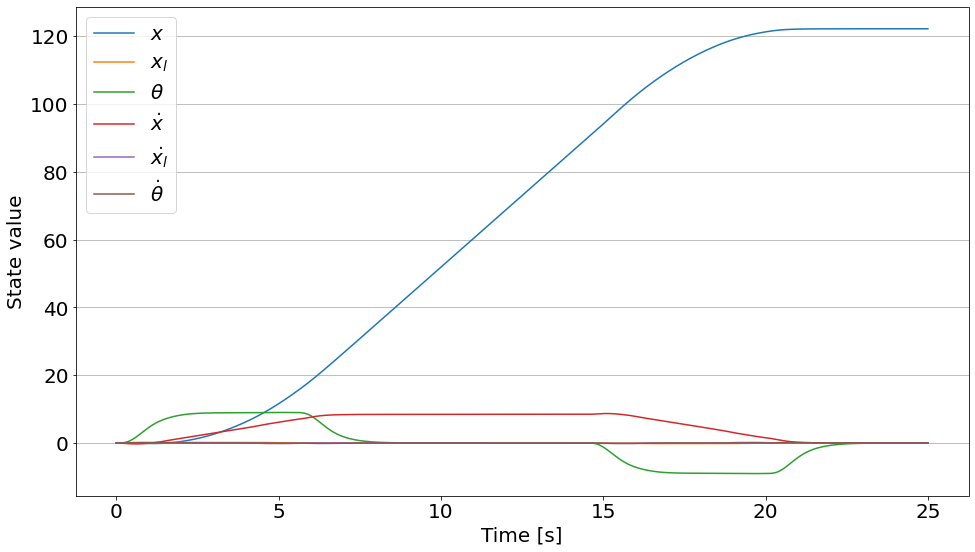

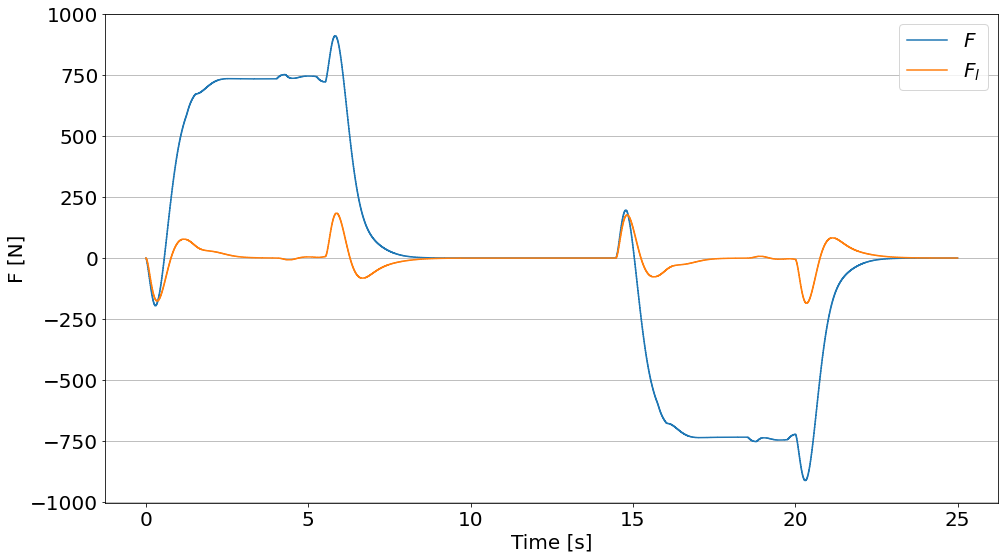

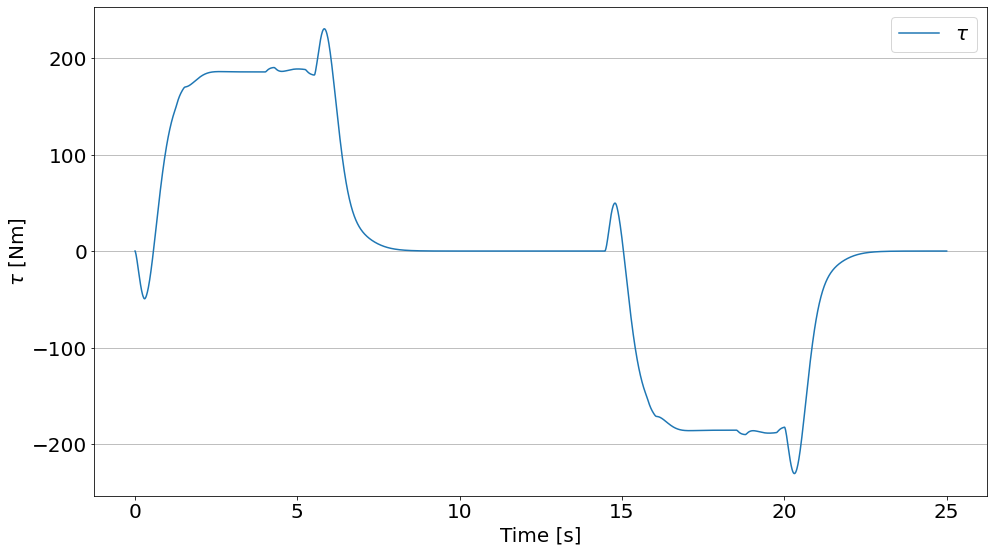

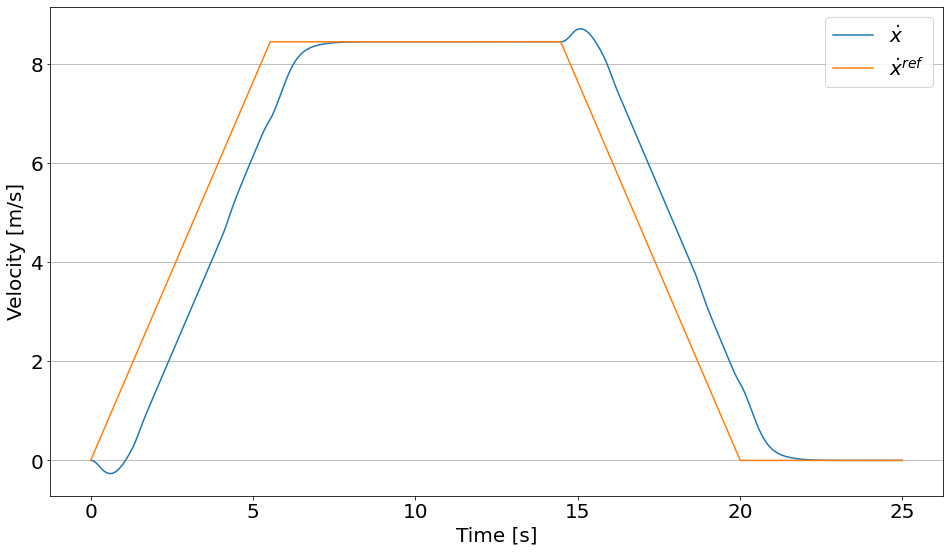

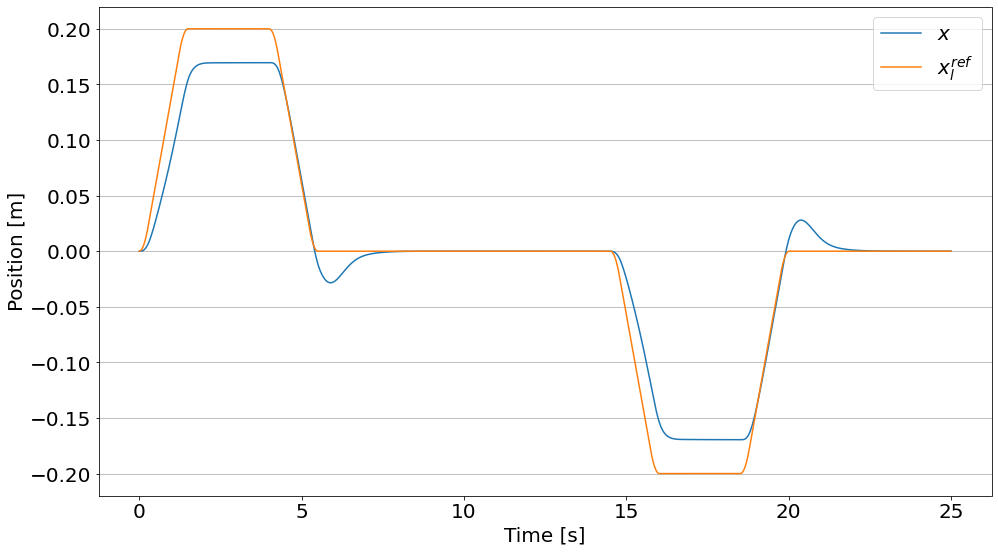

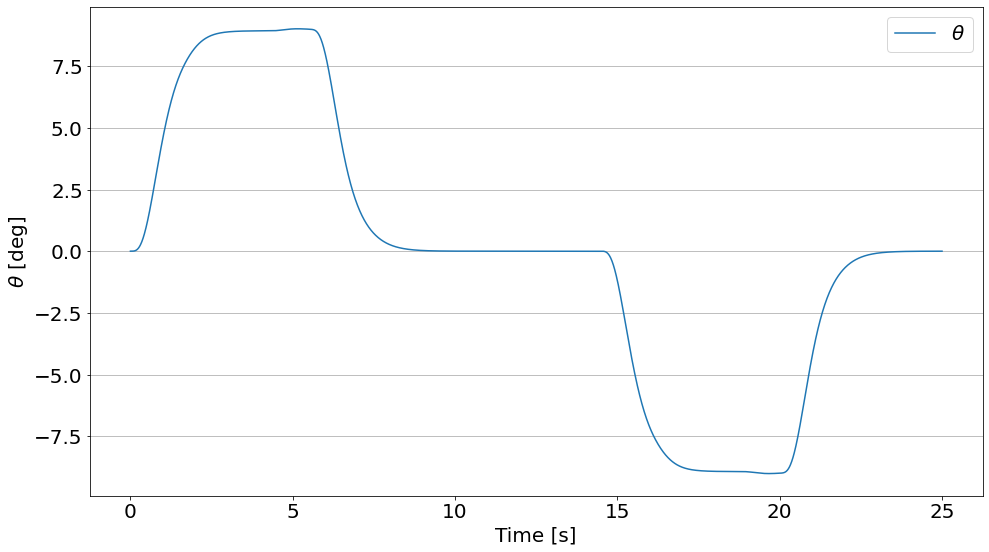

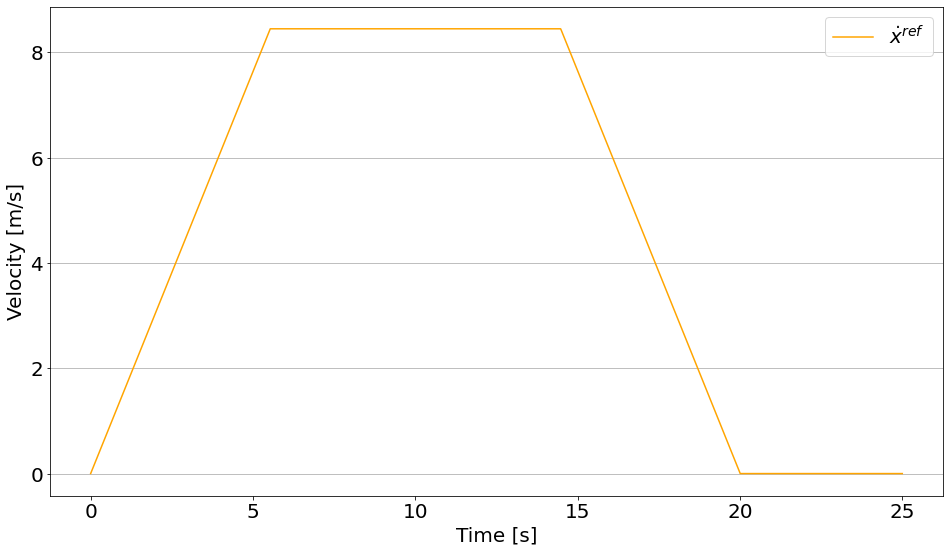

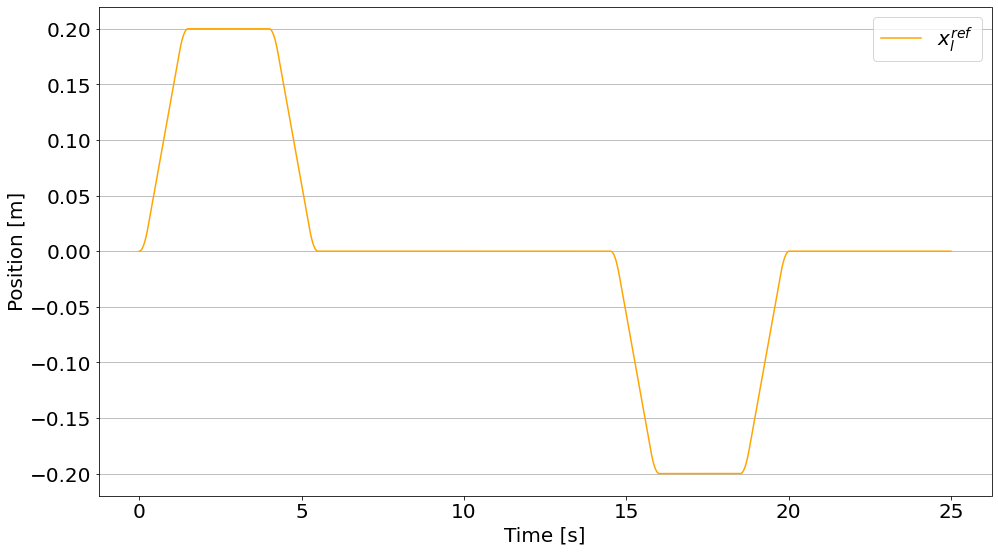

In [35]:
time = mpc.data['_time']
x_data = mpc.data['_x'][:,0]
xl_data  = mpc.data['_x'][:,1]
theta_data = mpc.data['_x'][:,2]
theta_data = theta_data*180/np.pi
xdot_data = mpc.data['_x'][:,3]
xldot_data = mpc.data['_x'][:,4]
thetadot_data = mpc.data['_x'][:,5]
xdot_ref = mpc.data['_tvp'][:,0]
xl_ref = mpc.data['_tvp'][:,1]
F_data = mpc.data['_u'][:,0]
Fl_data = mpc.data['_u'][:,1]
tau_data = F_data*param[r]
# time = mpc.data['_time']
# x_data = mpc.data['_x']
# xl_data  = mpc.data['x_l']
# theta_data = mpc.data['theta']
# xdot_data = mpc.data['x_dot']
# xldot_data = mpc.data['x_ldot']
# thetadot_data = mpc.data['theta_dot']
# xdot_ref = mpc.data['_tvp']
# F_data = mpc.data['Fw']
# Fl_data = mpc.data['Fl']

dt = 0.01
# dt = 1
N = len(time)*dt
t = np.linspace(0,N,len(time))

plt.figure(1, figsize=(16,9))
plt.plot(t, x_data, label='$x$')
plt.plot(t, xl_data, label='$x_{l}$')
plt.plot(t, theta_data, label='$\\theta$')
plt.plot(t, xdot_data, label='$\\dot{x}$')
plt.plot(t, xldot_data, label='$\\dot{x_l}$')
plt.plot(t, thetadot_data, label='$\\dot{\\theta}$')
plt.xlabel('Time [s]', fontsize=20)
plt.ylabel('State value', fontsize=20)
plt.legend(loc='best', ncol=1, fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid(True, axis='y')

plt.figure(2, figsize=(16,9))
plt.plot(t, F_data, drawstyle='steps-mid', label='$F$')
plt.plot(t, Fl_data, drawstyle='steps-mid', label='$F_{l}$')
plt.xlabel('Time [s]', fontsize=20)
plt.ylabel('F [N]', fontsize=20)
plt.legend(loc='best', ncol=1, fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid(True, axis='y')

plt.figure(3, figsize=(16,9))
plt.plot(t, tau_data, label='$\\tau$')
plt.xlabel('Time [s]', fontsize=20)
plt.ylabel('$\\tau$ [Nm]', fontsize=20)
plt.legend(loc='best', ncol=1, fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid(True, axis='y')

plt.figure(4, figsize=(16,9))
plt.plot(t, xdot_data, label='$\\dot{x}$')
plt.plot(t, xdot_ref, label='$\\dot{x}^{ref}$')
plt.xlabel('Time [s]', fontsize=20)
plt.ylabel('Velocity [m/s]', fontsize=20)
plt.legend(loc='best', ncol=1, fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid(True, axis='y')

plt.figure(5, figsize=(16,9))
plt.plot(t, xl_data, label='${x}$')
plt.plot(t, xl_ref, label='${x}^{ref}_{l}$')
plt.xlabel('Time [s]', fontsize=20)
plt.ylabel('Position [m]', fontsize=20)
plt.legend(loc='best', ncol=1, fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid(True, axis='y')

plt.figure(6, figsize=(16,9))
plt.plot(t, theta_data, label='$\\theta$')
plt.xlabel('Time [s]', fontsize=20)
plt.ylabel('$\\theta$ [deg]', fontsize=20)
plt.legend(loc='best', ncol=1, fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid(True, axis='y')

plt.figure(7, figsize=(16,9))
plt.plot(t, xdot_ref, label='$\\dot{x}^{ref}$', color='orange')
plt.xlabel('Time [s]', fontsize=20)
plt.ylabel('Velocity [m/s]', fontsize=20)
plt.legend(loc='best', ncol=1, fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid(True, axis='y')

plt.figure(8, figsize=(16,9))
plt.plot(t, xl_ref, label='${x}^{ref}_{l}$', color='orange')
plt.xlabel('Time [s]', fontsize=20)
plt.ylabel('Position [m]', fontsize=20)
plt.legend(loc='best', ncol=1, fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid(True, axis='y')

plt.show()

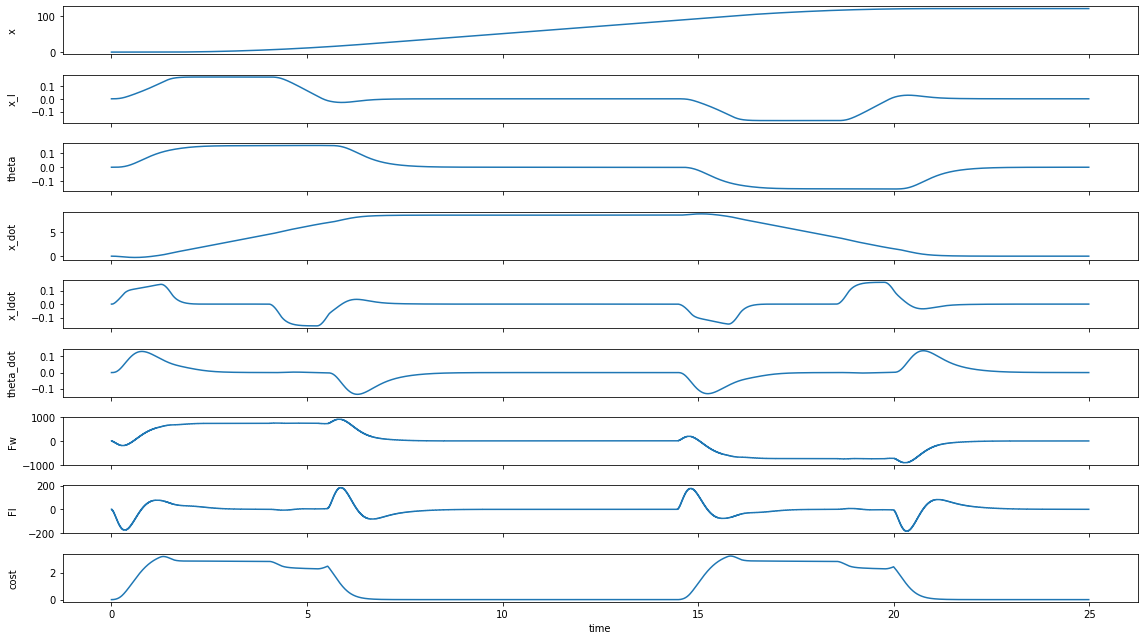

In [36]:
fig, ax, graphics = do_mpc.graphics.default_plot(mpc.data, figsize=(16,9))
graphics.plot_results()
graphics.reset_axes()
plt.show()

In [28]:
max(tau_data), min(tau_data), max(theta_data)*180/np.pi, min(theta_data)*180/np.pi

In [29]:
# from matplotlib import pyplot as plt
# import matplotlib.patches as patches
# import numpy as np
# from matplotlib.animation import FuncAnimation
# from IPython.display import HTML


# fig = plt.figure(3, figsize=(4,2), dpi=200)
# ax = plt.axes()
# plt.rcParams['font.size'] = '6'

# data = mpc.data['_x']

# def draw_model(time):
#     ax.cla()
    
#     frame = time*10

#     if frame >= 2499:
#         frame = 2499
    
#     x = data[frame, 0]
#     xdot = data[frame, 3]
#     xl = -data[frame,1]
#     th_rad = data[frame,2]
#     th_deg = -data[frame,2]*180/np.pi
    
#     radius = param[r]
    
#     # configure
#     x_wheel = x
#     y_wheel = radius
       
#     x_pen = x + (param[h_c] - param['c_height']/2)*np.sin(th_rad) - param['c_width']/2*np.cos(th_rad)
#     y_pen = radius + (param[h_c] - param['c_height']/2)*np.cos(th_rad) + param['c_width']/2*np.sin(th_rad)
    
#     x_torso = x + (param[h_t] - param['t_height']/2)*np.sin(th_rad) - (xl + param['t_width']/2)*np.cos(th_rad)
#     y_torso = radius + (param[h_t] - param['t_height']/2)*np.cos(th_rad) + (xl + param['t_width']/2)*np.sin(th_rad)
    
#     # wheel
#     ax.add_patch(
#         patches.Circle((x_wheel, y_wheel), 
#                        radius,
#                        edgecolor = 'red',
#                        facecolor = 'brown',
#                        fill=True,))
    
#     # pend
#     ax.add_patch(
#         patches.Rectangle((x_pen, y_pen), 
#                           param['c_width'], param['c_height'], th_deg,
#                           edgecolor = 'blue',
#                           facecolor = 'lightgray',
#                           fill=False,))

#     # torso
#     ax.add_patch(
#         patches.Rectangle((x_torso, y_torso), 
#                           param['t_width'], param['t_height'], th_deg,
#                           edgecolor = 'deeppink',
#                           facecolor = 'lightgray',
#                           fill=True,))
    
#     # data show up
#     ax.text(x-8, 6, 
#             r'$(x:{%s}m, \dotx:{%s}km/h)$' % (format(x,'.2f'), format(xdot*3.6,'.2f')))
#     ax.text(x-8, 5,        
#             r'$(x_l:{%s}m, \theta:{%s}deg)$' % (format(-xl,'.2f'), format(-th_deg,'.2f')))
     
#     ax.set_aspect('equal')
#     ax.set_xlim([-10+x,10+x])
#     ax.set_ylim([-0.5,7])
#     ax.grid(axis='both')
#     ax.set_xlabel('Position [m]', fontsize=6)

#     time += 1

# anim = FuncAnimation(fig, draw_model, frames=int(len(t)/10), interval=100)
# HTML(anim.to_html5_video())
# anim.save("dualmotion_segway_MPC_x_xl_ref.mp4",fps=20, dpi=200)


In [30]:
len(t), max(tau_data), min(tau_data), max(xl_data), min(xl_data), max(theta_data), min(theta_data), max(F), min(F)

TypeError: 'F' object is not iterable

In [ ]:
max(theta_data), min(theta_data)

In [ ]:
u0, u0[0]

(array([[0.02972765],
        [0.05706387]]),
 array([0.02972765]))

In [ ]:
x0[4]

array([2.82315098e-06])

In [ ]:
F_data

array([ 0.        , -1.26702797, -3.69947672, ...,  0.03294542,
        0.03130853,  0.02972765])

In [ ]:
len(xl_data)

In [ ]:
xl_data[299]

In [ ]:
len(xdot_data)

In [ ]:
x = data[2499, 0]